In [49]:
setwd("/Users/stevennguyen/Projects/scrnaseq-analysis")

In [50]:
# load libraries and seurat obj
library(Seurat)
library(ggplot2)
library(dplyr)

idc <- readRDS("/Users/stevennguyen/Projects/scrnaseq-analysis/data/processed/idc_clustered.rds")
idc

An object of class Seurat 
22914 features across 783 samples within 1 assay 
Active assay: RNA (22914 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

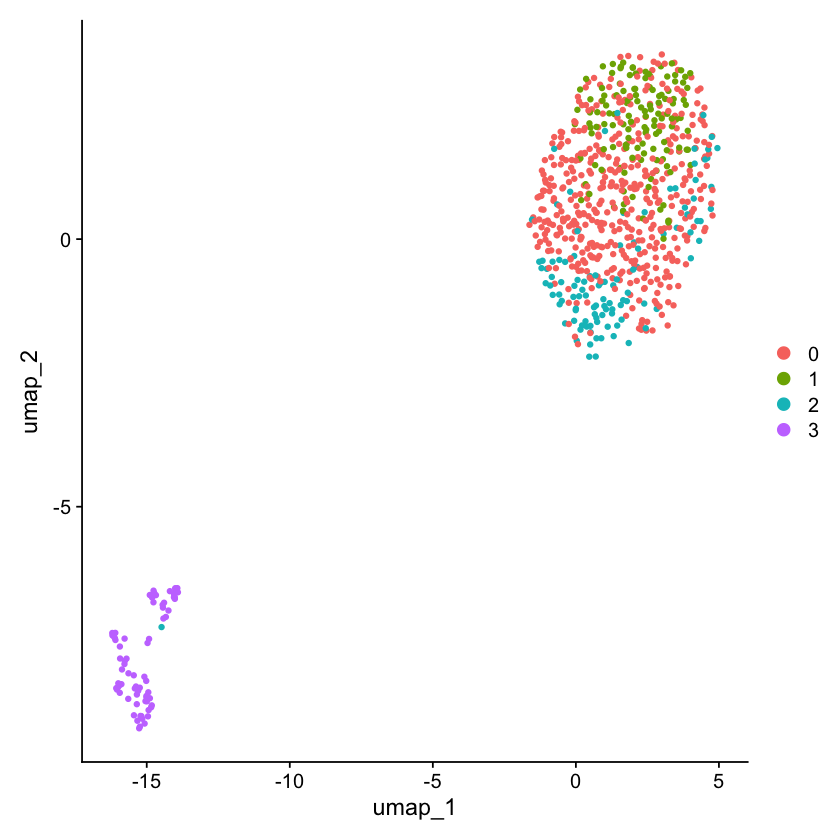

In [51]:
# visualize clusters again - clusters 0,1,2 are less variable vs. cluster 3
DimPlot(idc, reduction = "umap")

## Finding cluster markers for cell type annotation


In [52]:
# find markers for every cluster compared to all remaining cells, report only the positive
idc.markers <- FindAllMarkers(idc, only.pos = TRUE)
idc.markers <- idc.markers|>
                group_by(cluster) 
                   

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



In [53]:
top5_cluster1

[1] "CCDC160"    "CCDC71"     "SLC4A4"     "AC122719.3" "SORCS1"

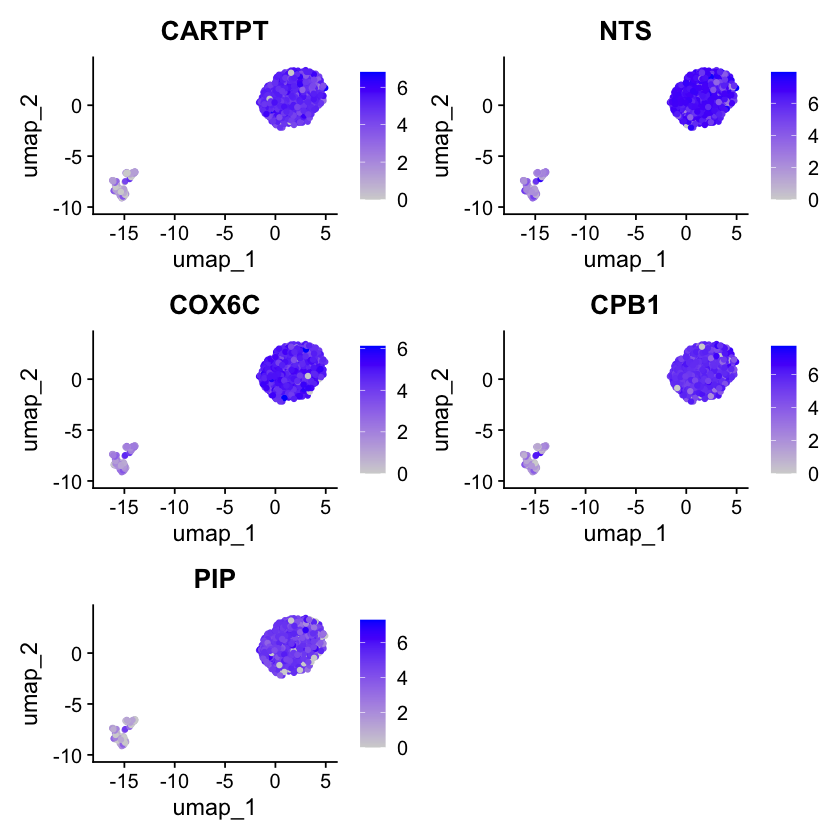

[1] "CARTPT" "NTS"    "COX6C"  "CPB1"   "PIP"

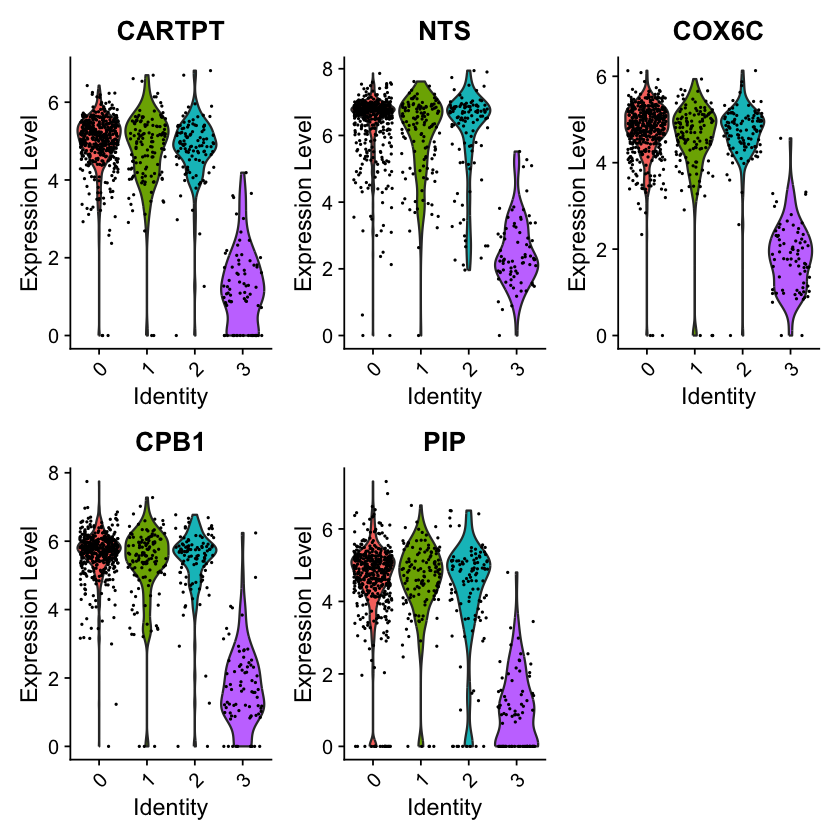

In [54]:
# visualize top markers in each cluster 
top5_cluster0 <- head(subset(idc.markers, cluster == 0)$gene, 5)
FeaturePlot(idc, features = top5_cluster0)
VlnPlot(idc, features = top5_cluster0)
top5_cluster0

# CARTPT - potential biomarker and oncogene for IDC; contributes to increased cancer cell survival and resistance to tamoxifen 
# NTS - involved in cancer cell proliferation and migration (promotes epithelial - mesenchymal transition) 
# COX6C - involved in cellular respiration, can be upregulated in proliferating cells (like cancer cells) 

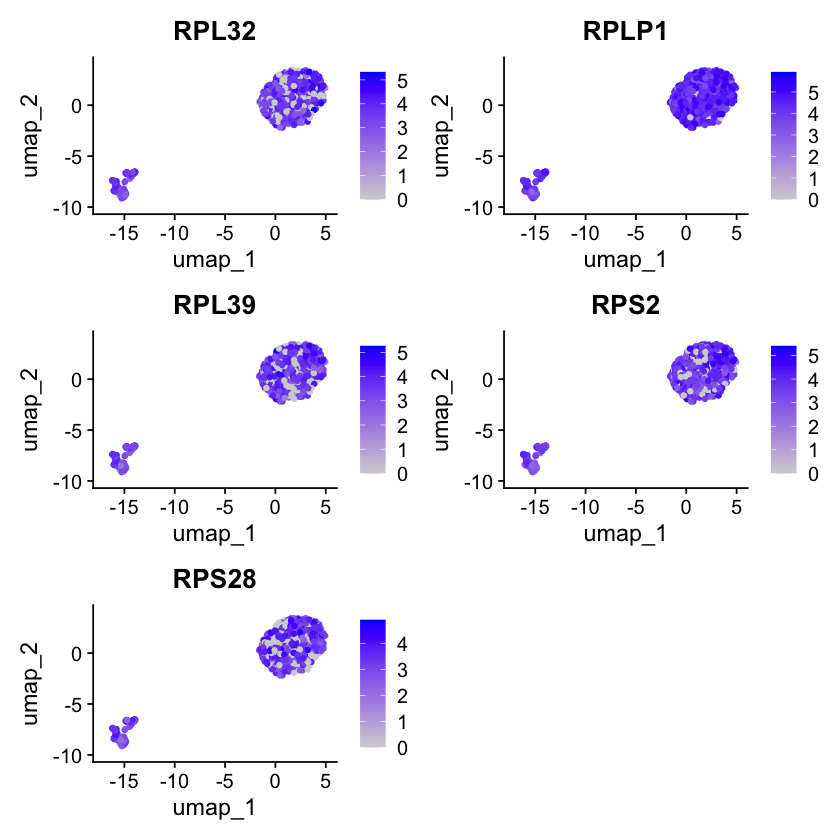

[1] "RPL32" "RPLP1" "RPL39" "RPS2"  "RPS28"

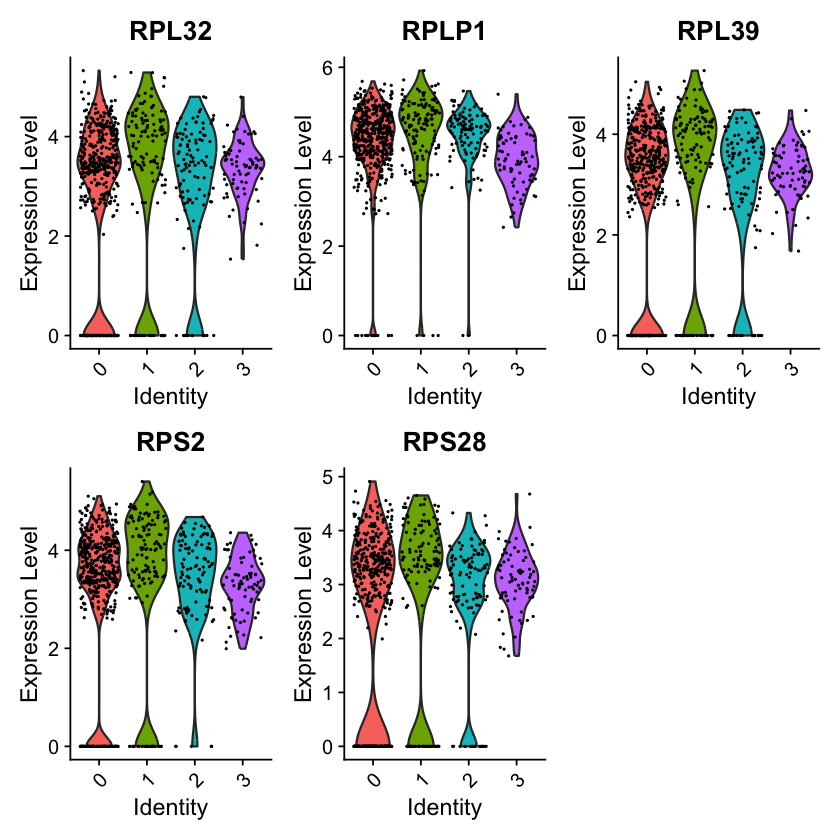

In [55]:
top5_cluster1 <- head(subset(idc.markers, cluster == 1)$gene, 5)
FeaturePlot(idc, features = top5_cluster1)
VlnPlot(idc, features = top5_cluster1)
top5_cluster1

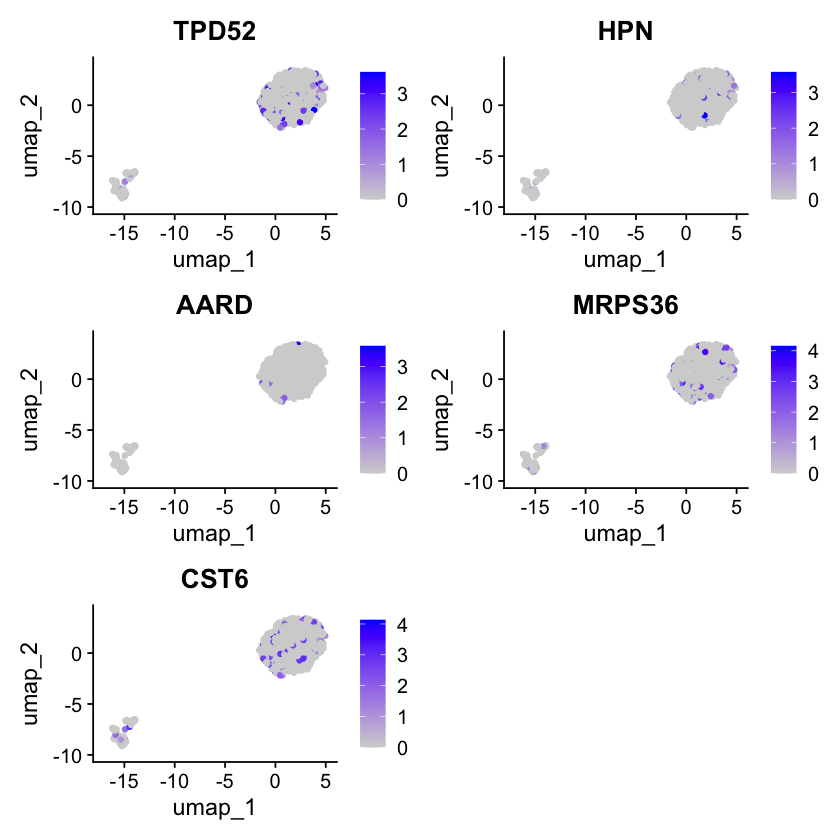

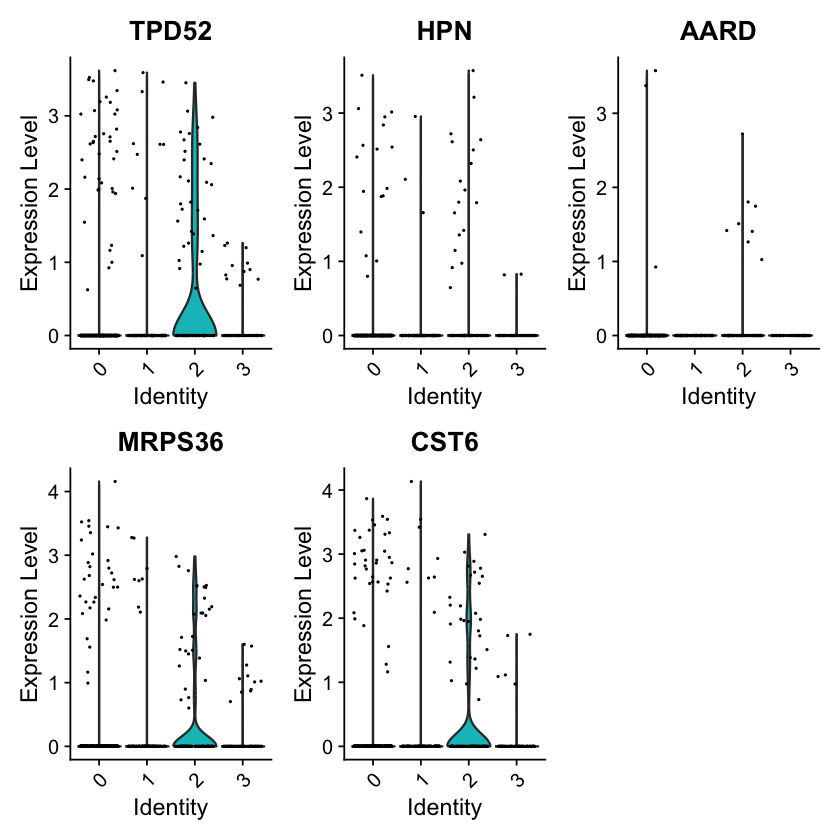

In [56]:
top5_cluster2 <- head(subset(idc.markers, cluster == 2)$gene, 5)
FeaturePlot(idc, features = top5_cluster2)
VlnPlot(idc, features = top5_cluster2)

## Further analysis and identification of cluster 2

Warning message:
“All cells have the same value (0) of “CDH2””
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of CDH2.”


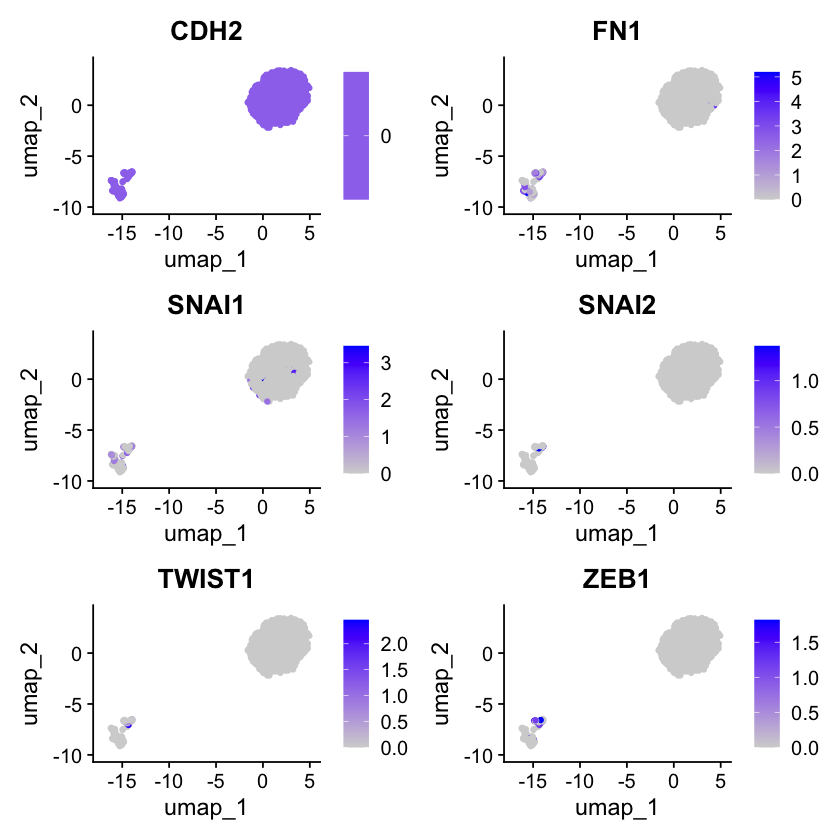

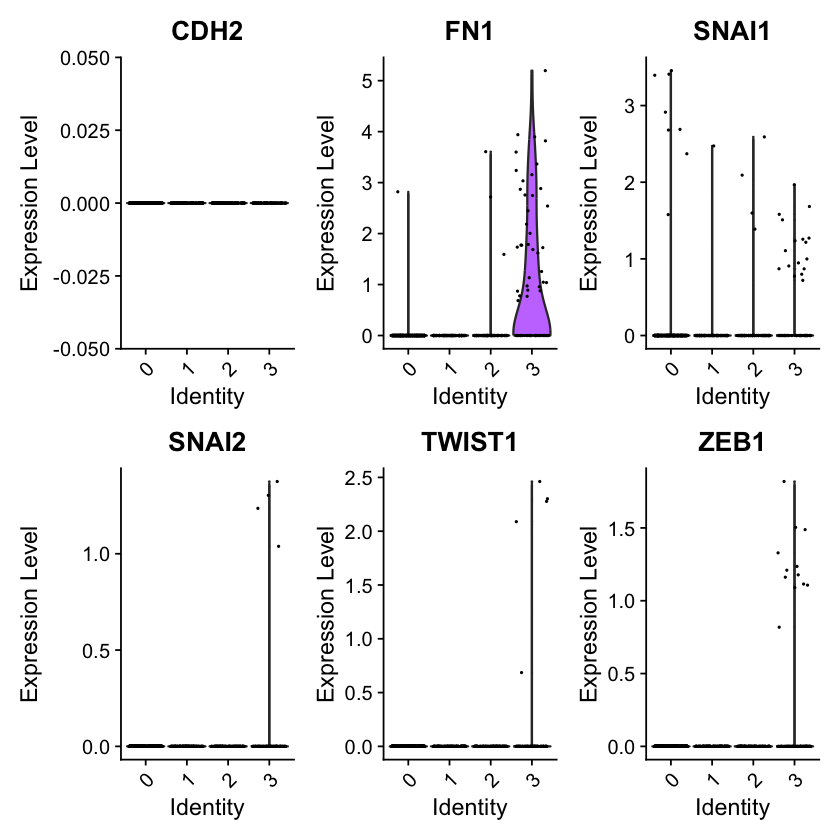

In [57]:
# VIM is a strong EMT marker, suggesting cluster 3 contains invasive mesenchymal like cancer cells 
# GSTP1 linked to EMT in cancer b/c it contributes to aggressive state of cancer cells - invasive and drug resistant 
# ANXA1 correlated with EMT and cancer - involved in cell proliferation and invasiveness 
# PLIN2 regulates lipid droplets and promotes mesenchymal markers, while decreasing epithelial markers 
# MARCKS promotes cell migration 

# top markers of cluster 3 all point to progression of mesenchymal/invasive like phenotypes 

# check other EMT markers to identify if cluster 3 is also upregulated in these 
emt_markers <- c("CDH2", "FN1", "SNAI1", "SNAI2", "TWIST1", "ZEB1")
FeaturePlot(idc, features = emt_markers)
VlnPlot(idc, features = emt_markers)

# FN1 part of ECM and interacts with cytoskeleton 

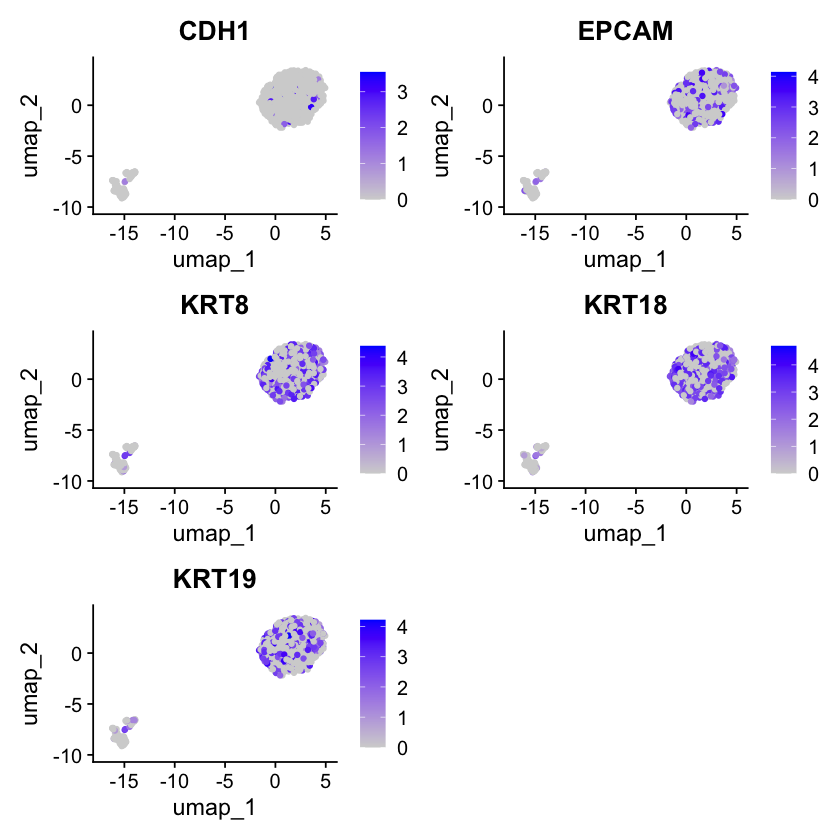

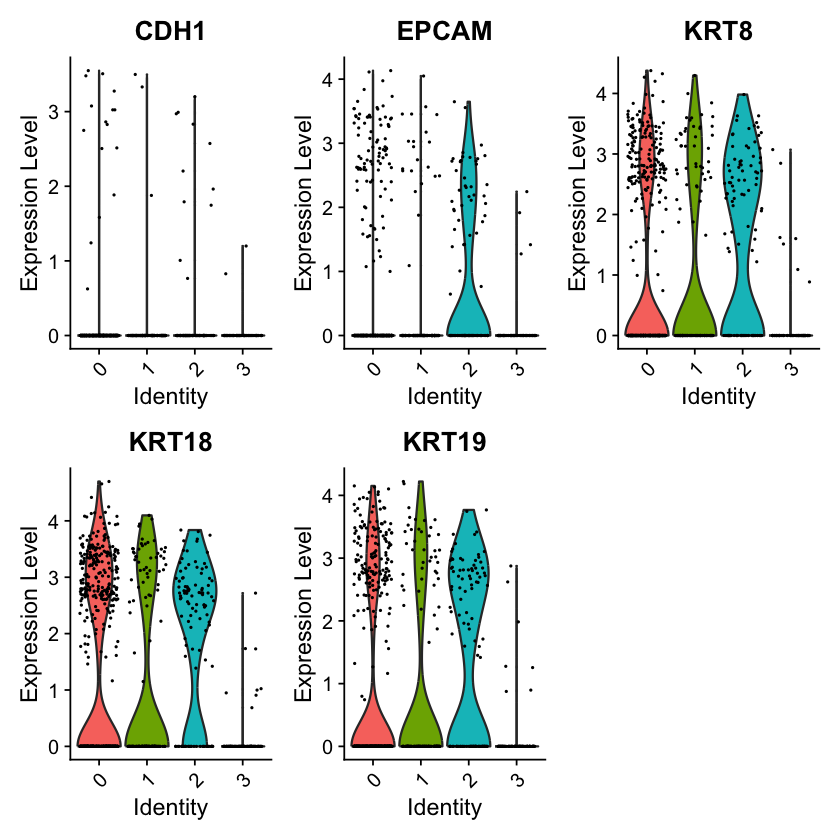

In [58]:
# Epithelial markers that should be lowly expressed in cluster 3 and highly expressed in 0, 1, and 2
epithelial_markers <- c("CDH1", "EPCAM", "KRT8", "KRT18", "KRT19")
FeaturePlot(idc, features = epithelial_markers)
VlnPlot(idc, features = epithelial_markers)

## Cluster 3 - mesenchymal-like cells (high expression of VIM, an EMT marker) 

## Is there any variation between epithelial cell cluster: Cluster 0, 1, and 2

In [69]:
# Compare epithelial clusters 0, 1, and 2
idc.markers 
markers_0_vs_1 <- FindMarkers(idc, ident.1 = 0, ident.2 = 1)
markers_0_vs_2 <- FindMarkers(idc, ident.1 = 0, ident.2 = 2)
markers_1_vs_2 <- FindMarkers(idc, ident.1 = 1, ident.2 = 2)

In [70]:
vs_markers <- list(markers_0_vs_1,
               markers_0_vs_2,
               markers_1_vs_2)

for (marker_set in vs_markers) {
    marker_set <- marker_set |> 
        arrange(p_val_adj)
    print(head(marker_set, n = 5))
}

                p_val avg_log2FC pct.1 pct.2   p_val_adj
HSPA1A   2.377800e-07  0.7440364 0.782 0.515 0.005448490
HSP90AA1 4.152354e-07  0.7184332 0.808 0.590 0.009514703
MALAT1   2.086713e-06  0.3375325 0.987 0.970 0.047814949
JUNB     1.679031e-05  0.7379381 0.530 0.299 0.384733166
DYNLL1   1.736014e-05  1.0454599 0.438 0.224 0.397790152
               p_val avg_log2FC pct.1 pct.2    p_val_adj
DNAJC21 1.760783e-10  -2.203984 0.006 0.119 4.034659e-06
ATG101  9.767817e-10  -1.526747 0.028 0.183 2.238198e-05
DCTN6   1.017442e-09  -2.154103 0.026 0.174 2.331366e-05
TPD52   6.760311e-09  -1.067065 0.082 0.294 1.549058e-04
PHF10   8.933764e-09  -4.236658 0.002 0.083 2.047083e-04
               p_val avg_log2FC pct.1 pct.2    p_val_adj
CEBPB   1.291177e-10  -1.394642 0.119 0.541 2.958602e-06
EGR1    3.444479e-10  -1.629383 0.082 0.459 7.892680e-06
CD81    6.221867e-10  -2.688676 0.030 0.330 1.425679e-05
JUNB    8.132752e-10  -1.024081 0.299 0.807 1.863539e-05
TSC22D1 5.904310e-09  -3.292936

In [82]:
split_markers <- function(markers_df) {
        markers_split <- markers_df |>
                            arrange(p_val_adj) |>
                                split(~ avg_log2FC > 0)
    list(
        up = markers_split$'TRUE',
        down = markers_split$'FALSE'
    )
    }

markers_0vs1 <- split_markers(markers_0_vs_1)
markers_0vs2 <- split_markers(markers_0_vs_2) 
markers_1vs2 <- split_markers(markers_1_vs_2)
split_list <- list(markers_0vs1,
                  markers_0vs2,
                  markers_1vs2)

In [85]:
#plot up and downregulated genes 
plot_top5 <- function(markers_df, filename_prefix) {
    # upregulated
    pdf(paste0(filename_prefix, "_upregulated.pdf"), width = 11, height = 8.5)
    
    FeaturePlot(idc, features = head(rownames(markers_df$up), n = 5))
    VlnPlot(idc, features = head(rownames(markers_df$up), n = 5),idents = c(0,1,2))
    
    dev.off()

    # downregulated
    pdf(paste0(filename_prefix, "_downregulated.pdf"), width = 11, height = 8.5)

    FeaturePlot(idc, features = head(rownames(markers_df$down), n = 5))
    VlnPlot(idc, features = head(rownames(markers_df$down), n = 5),idents = c(0,1,2))

    dev.off()
    
    }
plot_top5(markers_0vs1, "clusters0vs1_up_and_down.pdf")
plot_top5(markers_0vs2, "clusters0vs2_up_and_down.pdf")
plot_top5(markers_1vs2, "clusters1vs2_up_and_down.pdf")

pdf 
  2

pdf 
  2

pdf 
  2

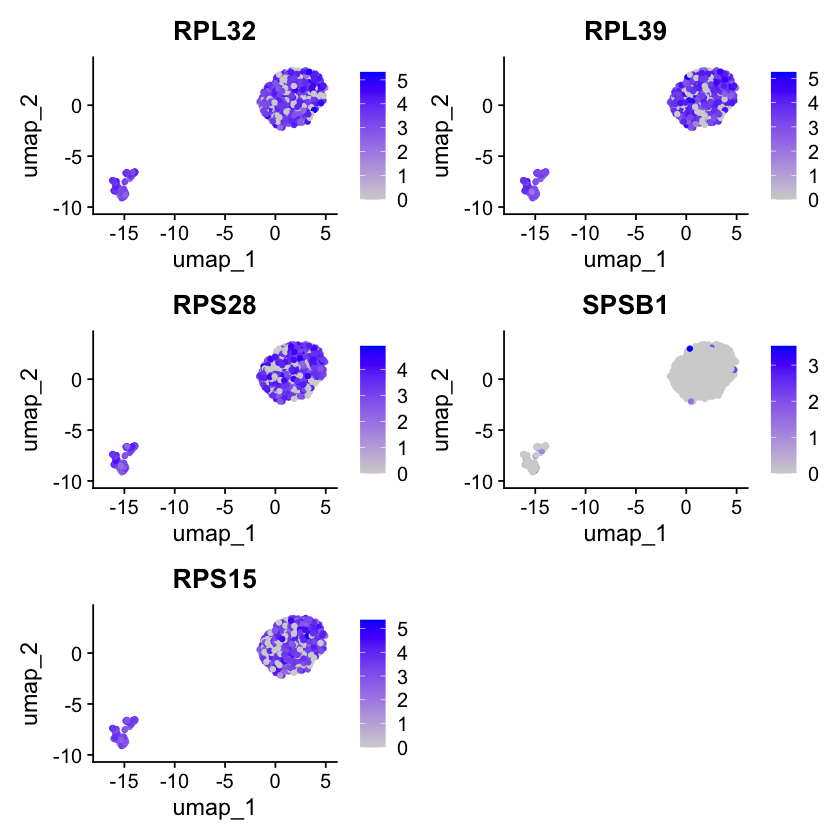

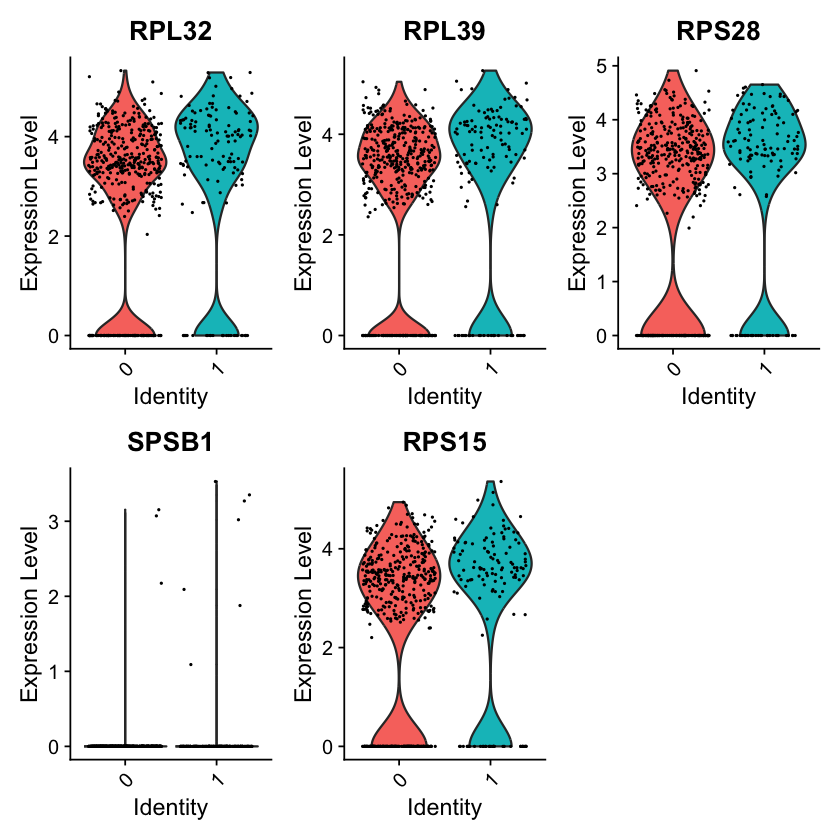

In [73]:
# top 5 downregulated in cluster 0 vs. 1
FeaturePlot(idc, features = head(rownames(markers_0vs1_down), n = 5))
VlnPlot(idc, features = head(rownames(markers_0vs1_down), n = 5),idents = c(0,1))

In [74]:
print(head(rownames(markers_0vs1_down), n = 5))

[1] "RPL32" "RPL39" "RPS28" "SPSB1" "RPS15"


In [86]:
#TODO 
# explore the 0vs1, 0vs2, and 1vs2 more 
# sort markers by p value, if not enough low then merge 
